In [1]:
import pandas as pd
import numpy as np
# import sklearn
# import matplotlib.pyplot as plt 
# import seaborn as sns
# sklearn.set_config(transform_output="pandas")

In [2]:
"""sklearn.set_config(transform_output="pandas")
we usually get the encoded data in numpy arrays and it will cause problems 
when we use category encoders, so for category encoders and sklearn pipeline to be compatible 
we set sklearn transform output to pandas instead of getting it in numpy arrays form
"""


'sklearn.set_config(transform_output="pandas")\nwe usually get the encoded data in numpy arrays and it will cause problems \nwhen we use category encoders, so for category encoders and sklearn pipeline to be compatible \nwe set sklearn transform output to pandas instead of getting it in numpy arrays form\n'

In [3]:
l = "blue red green blue green green blue".split()
print(l)
ll = "a b b a a c b".split()
ll

['blue', 'red', 'green', 'blue', 'green', 'green', 'blue']


['a', 'b', 'b', 'a', 'a', 'c', 'b']

In [4]:
data = {
    "fav_color": l,
    "height" : [1.77,1.32,1.81,1.56,1.64,1.61,1.73],
    "cat_col" : ll,
    "target_var" : [1,0,1,0,1,0,0]
}

df = pd.DataFrame(data)
df

,fav_color,height,cat_col,target_var
0,blue,1.77,a,1
1,red,1.32,b,0
2,green,1.81,b,1
3,blue,1.56,a,0
4,green,1.64,a,1
5,green,1.61,c,0
6,blue,1.73,b,0


In [5]:
df["target_var"].shape

(7,)

In [6]:
df[["target_var"]].shape

(7, 1)

In [7]:
from sklearn.preprocessing import TargetEncoder
t = TargetEncoder(cv=2)
t1 = t.fit_transform(df[["fav_color"]], df["target_var"])
t1
# np.array(t1).round(3)

array([[0.5       ],
       [0.33333333],
       [0.33333333],
       [0.5       ],
       [0.33333333],
       [0.33333333],
       [0.5       ]])

In [8]:
tt = TargetEncoder(cv=2,smooth=2,shuffle=False)
tt1 = tt.fit_transform(df[["fav_color"]], df["target_var"])
tt1

array([[0.22222222],
       [0.33333333],
       [0.41666667],
       [0.22222222],
       [0.66666667],
       [0.66666667],
       [0.5       ]])

In [16]:
from category_encoders import BaseNEncoder

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import TargetEncoder,OneHotEncoder

t_feature = ["fav_color"]
t_imputer = Pipeline(steps=[
    ("encoding", TargetEncoder(cv=2,smooth=2,shuffle=False))
])

cat_feature = ["cat_col"]
cat_imputer = Pipeline(steps=[
    ("Base_N",BaseNEncoder(base=2))
])

preprocessor = ColumnTransformer(transformers=[
    ("encoding", t_imputer,t_feature),
    ("one_hot", cat_imputer,cat_feature)
],remainder="passthrough")

transformed_data = preprocessor.fit_transform(df,df["target_var"])
transformed_data


array([[0.22222222, 0.        , 1.        , 1.77      , 1.        ],
       [0.33333333, 1.        , 0.        , 1.32      , 0.        ],
       [0.41666667, 1.        , 0.        , 1.81      , 1.        ],
       [0.22222222, 0.        , 1.        , 1.56      , 0.        ],
       [0.66666667, 0.        , 1.        , 1.64      , 1.        ],
       [0.66666667, 1.        , 1.        , 1.61      , 0.        ],
       [0.5       , 1.        , 0.        , 1.73      , 0.        ]])

In [18]:
pd.DataFrame(transformed_data)


,0,1,2,3,4
0,0.222222,0.0,1.0,1.77,1.0
1,0.333333,1.0,0.0,1.32,0.0
2,0.416667,1.0,0.0,1.81,1.0
3,0.222222,0.0,1.0,1.56,0.0
4,0.666667,0.0,1.0,1.64,1.0
5,0.666667,1.0,1.0,1.61,0.0
6,0.500000,1.0,0.0,1.73,0.0


In [11]:
pd.DataFrame({"T1" : t1.ravel(), "T2" : tt1.ravel()})

,T1,T2
0,0.500000,0.222222
1,0.333333,0.333333
2,0.333333,0.416667
3,0.500000,0.222222
4,0.333333,0.666667
5,0.333333,0.666667
6,0.500000,0.500000


# BaseN Encoding

In [12]:
import category_encoders as ce
import pandas as pd

#Create the dataframe
data=pd.DataFrame({'city':['Delhi','Mumbai','Hyderabad','Chennai','Bangalore','Delhi','Hyderabad','Mumbai','Agra']})

#Create an object for Base N Encoding
encoder= ce.BaseNEncoder(cols=['city'],return_df=True,base=1)

#Original Data
enc = encoder.fit_transform(data)
enc


,city_0,city_1,city_2,city_3,city_4,city_5,city_6
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0
5,0,1,0,0,0,0,0
6,0,0,0,1,0,0,0
7,0,0,1,0,0,0,0
8,0,0,0,0,0,0,1


In [13]:
np.array(enc)

array([[0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [14]:
# now setting base to diff values
from category_encoders import BaseNEncoder
bs = BaseNEncoder(cols=["city"],base=2)
# if we dont provide cols in BaseN encoder then it will take all non numeric features 
# and convert it into numeric 
# If the cols parameter isn’t passed, every non-numeric column will be converted.
bs.fit_transform(data)

,city_0,city_1,city_2
0,0,0,1
1,0,1,0
2,0,1,1
3,1,0,0
4,1,0,1
5,0,0,1
6,0,1,1
7,0,1,0
8,1,1,0


In [15]:
"""All of these are fully compatible sklearn transformers, 
so they can be used in pipelines or in your existing scripts. 
If the cols parameter isn't passed, every non-numeric column will be converted. 
See below for detailed documentation

CategoryEncoders internally works with pandas DataFrames as 
apposed to sklearn which works with numpy arrays. This can cause problems in 
sklearn versions prior to 1.2.0. In order to ensure full compatibility with 
sklearn set sklearn to also output DataFrames. This can be done by"""

"""sklearn.set_config(transform_output="pandas")"""

"""Pipeline(
    steps=[
        ("preprocessor", SomePreprocessor().set_output("pandas"),
        ("encoder", SomeEncoder()),
    ]
)"""

'Pipeline(\n    steps=[\n        ("preprocessor", SomePreprocessor().set_output("pandas"),\n        ("encoder", SomeEncoder()),\n    ]\n)'

# Ordinal Encoding

In [19]:
data=pd.DataFrame({'city':['Delhi','Mumbai','Hyderabad','Chennai','Bangalore','Delhi','Hyderabad','Mumbai','Agra']})
data

,city
0,Delhi
1,Mumbai
2,Hyderabad
3,Chennai
4,Bangalore
5,Delhi
6,Hyderabad
7,Mumbai
8,Agra


In [28]:
data["mappa"] = data["city"].map({"Delhi" : 1, "Mumbai":2})

In [55]:
ind = {val : index for index, val in enumerate(data["city"].unique(),1)}
ind
    

{'Delhi': 1,
 'Mumbai': 2,
 'Hyderabad': 3,
 'Chennai': 4,
 'Bangalore': 5,
 'Agra': 6}

In [56]:
data["mappa"] = data["city"].map(ind)
data

,city,mappa
0,Delhi,1
1,Mumbai,2
2,Hyderabad,3
3,Chennai,4
4,Bangalore,5
5,Delhi,1
6,Hyderabad,3
7,Mumbai,2
8,Agra,6


In [58]:
demo = list(ind.keys())

In [61]:
from sklearn.preprocessing import OrdinalEncoder
orr = OrdinalEncoder(categories=[demo])
orr.fit_transform(data[["city"]]) 

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [0.],
       [2.],
       [1.],
       [5.]])

In [54]:
orr.n_features_in_

1

In [46]:
# Sample dataframe with 2 ordinal categorical columns: 'temp' and 'place'
categorical_df = pd.DataFrame({'my_id': ['101', '102', '103', '104'],
                               'temp': ['hot', 'warm', 'cool', 'cold'], 
                               'place': ['third', 'second', 'first', 'second']})

# In the 'temp' column, I want 'cold' to be 0, 'cool' to be 1, 'warm' to be 2, and 'hot' to be 3
# In the 'place' column, I want 'first' to be 0, 'second' to be 1, and 'third' to be 2
temp_categories = ['cold', 'cool', 'warm', 'hot']
place_categories = ['first', 'second', 'third']

# Now, when you instantiate the encoder, both of these lists go in one big categories list:
encoder = OrdinalEncoder(categories=[temp_categories, place_categories])

encoder.fit_transform(categorical_df[['temp', 'place']])
# >>array([[3., 2.],
#          [2., 1.],
#          [1., 0.],
#          [0., 1.]])

array([[3., 2.],
       [2., 1.],
       [1., 0.],
       [0., 1.]])

In [49]:
temp_categories = ['cold', 'cool', 'warm', 'hot']
place_categories = ['first', 'second', 'third']

cat_fea = ["temp", "place"]
cat_imputer1 = Pipeline(steps=[
    ("encoding", OrdinalEncoder(categories=[temp_categories, place_categories]))
]) 

ct = ColumnTransformer(transformers=[
    ("encoding", cat_imputer1,cat_fea)
])

ct.fit_transform(categorical_df)

array([[3., 2.],
       [2., 1.],
       [1., 0.],
       [0., 1.]])

# Plotting 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(2022)  # creates a consistent sample
y = np.random.rand(10,4)
y[:,0]= np.arange(10)
df = pd.DataFrame(y, columns=["X", "A", "B", "C"])

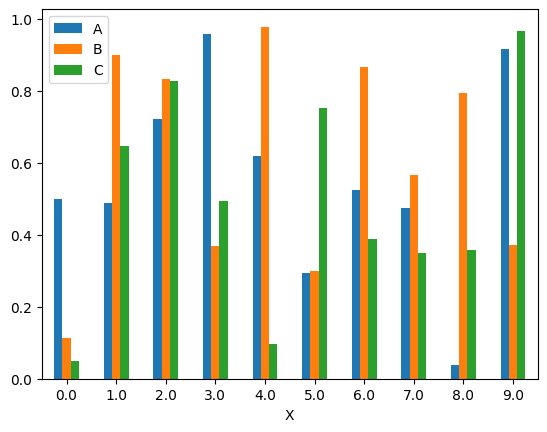

In [4]:
ax = df.plot(x="X", y=["A", "B", "C"], kind="bar", rot=0)

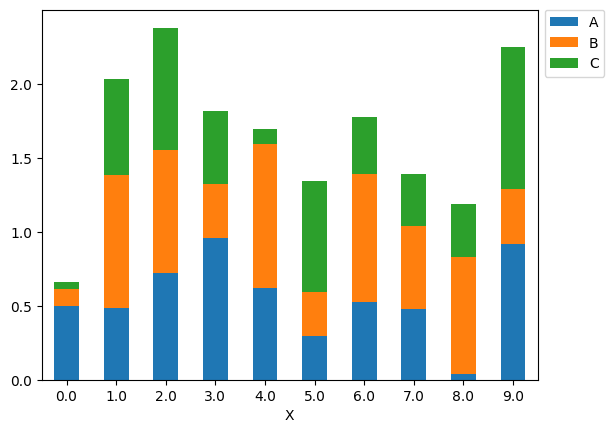

In [5]:
ax = df.plot(x="X", y=["A", "B", "C"], kind="bar", rot=0, stacked=True)
_ = ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

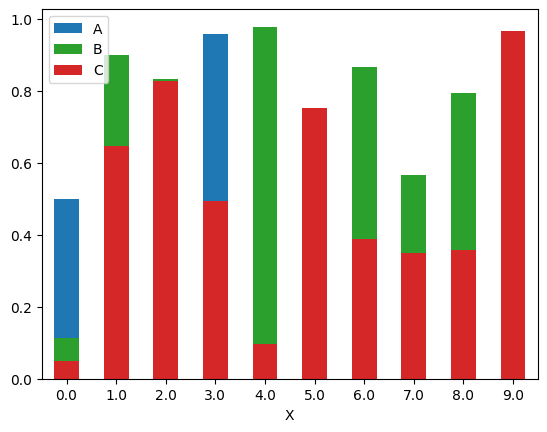

In [6]:
ax = df.plot(x="X", y="A", kind="bar", rot=0)
df.plot(x="X", y="B", kind="bar", ax=ax, color="C2", rot=0)
df.plot(x="X", y="C", kind="bar", ax=ax, color="C3", rot=0)

plt.show()

<Axes: xlabel='X'>

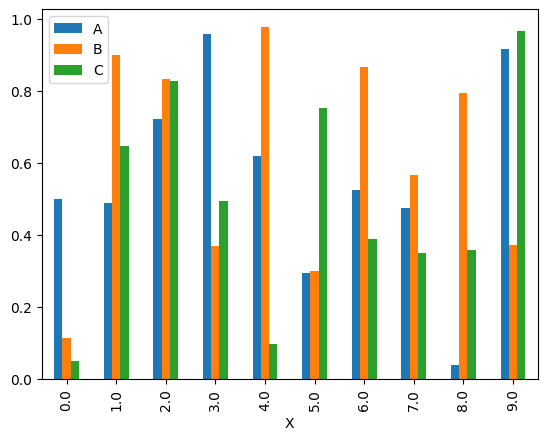

In [7]:
df[["X", "A", "B", "C"]].plot(x="X", kind="bar")

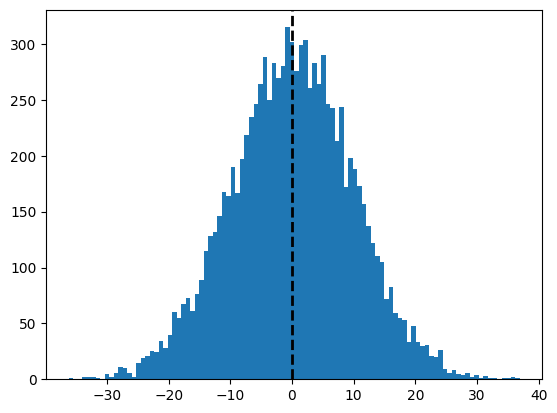

In [4]:
# importing numpy as np
import numpy as np

# importing pyplot as plt
import matplotlib.pyplot as plt

# position
pos = 0

# scale
scale = 10

# size
size = 10000


# random seed
np.random.seed(10)

# creating a normal distribution data
values = np.random.normal(pos, scale, size)

# plotting histograph
plt.hist(values, 100)

# plotting mean line
plt.axvline(values.mean(), color='k', linestyle='dashed', linewidth=2)

# showing the plot
plt.show()


<Axes: ylabel='Count'>

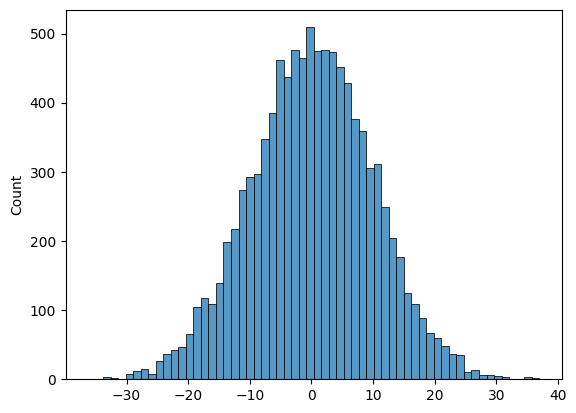

In [6]:
sns.histplot(values)

In [9]:
len(values[values < 0])

4946

C:\Users\solat\AppData\Local\Temp\ipykernel_10248\1053519759.py:1: RuntimeWarning: invalid value encountered in log
  log_val = np.log(values)


<Axes: ylabel='Count'>

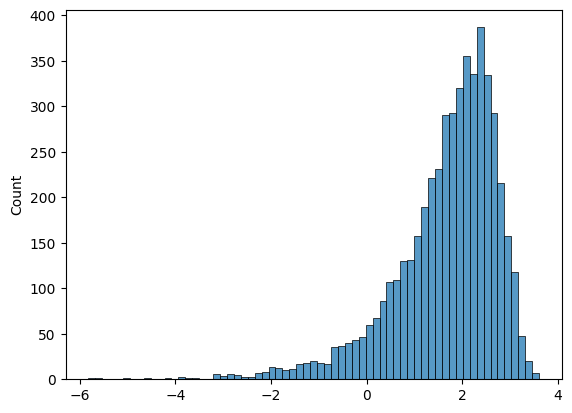

In [5]:
log_val = np.log(values)
sns.histplot(log_val)

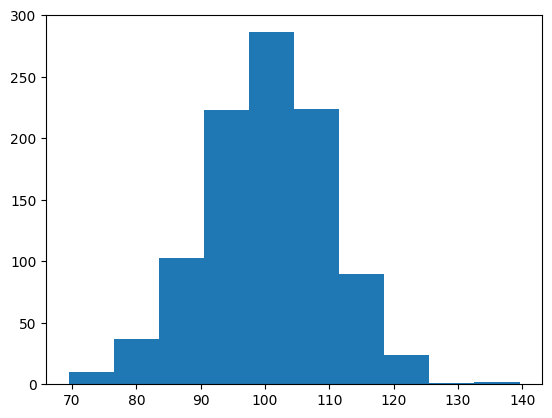

In [10]:
## setting the seed for the random generation
np.random.seed(1)

## generating univariate data
data = 10 * np.random.randn(1000) + 100

## plotting the data
plt.hist(data)
plt.show()

<Axes: ylabel='Count'>

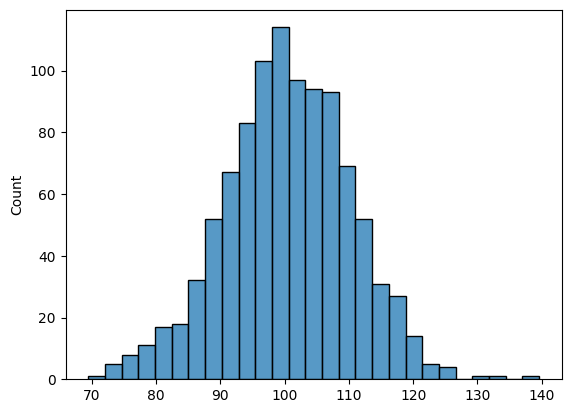

In [13]:
sns.histplot(data)

In [11]:
data[data<0]

array([], dtype=float64)

<Axes: ylabel='Count'>

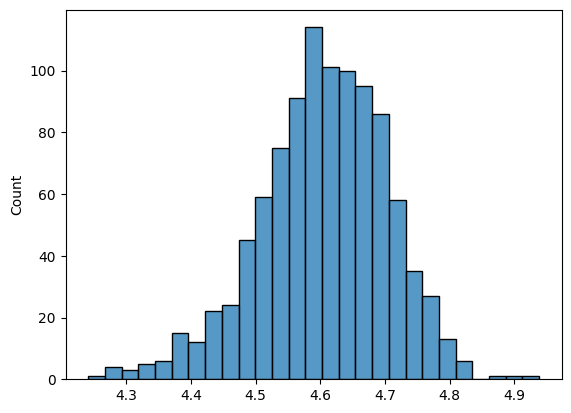

In [12]:
log_d = np.log(data)
sns.histplot(log_d)

In [20]:
# plt.axvline(values.mean(), color='k', linestyle='dashed', linewidth=2)
data.shape

(1000,)

In [50]:
def ff():
    return pd.DataFrame(data).skew()



TypeError: text() missing 3 required positional arguments: 'x', 'y', and 's'

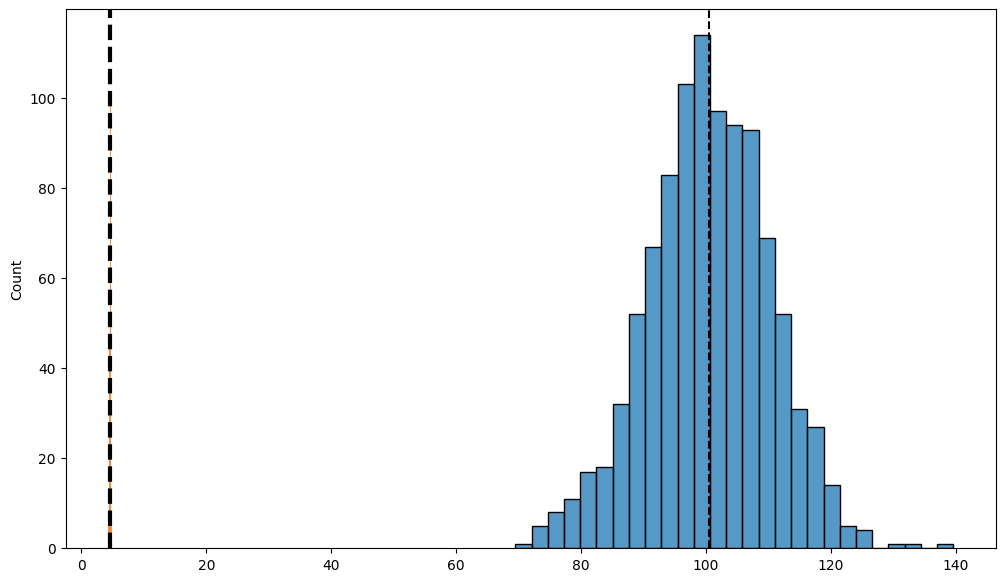

In [59]:
fig, ax = plt.subplots(figsize=(12,7))
# plt.figure()
# plt.subplot(1,2,1)
sns.histplot(data)
plt.axvline(data.mean(),color='k',linestyle='dashed')
# plt.subplot(1,2,2)
sns.histplot(log_d)
plt.axvline(log_d.mean(),color='k',linestyle='dashed',linewidth=3)
# patches = ax.patches 
# h = patches.get_height()
# w = patches.get_width()
ax.text()

In [17]:
pd.DataFrame(data).skew()

0   -0.068455
dtype: float64

In [19]:
pd.DataFrame(log_d).skew()

0   -0.400726
dtype: float64

Text(0.75, 0.75, '0   -0.068455\ndtype: float64 Skew')

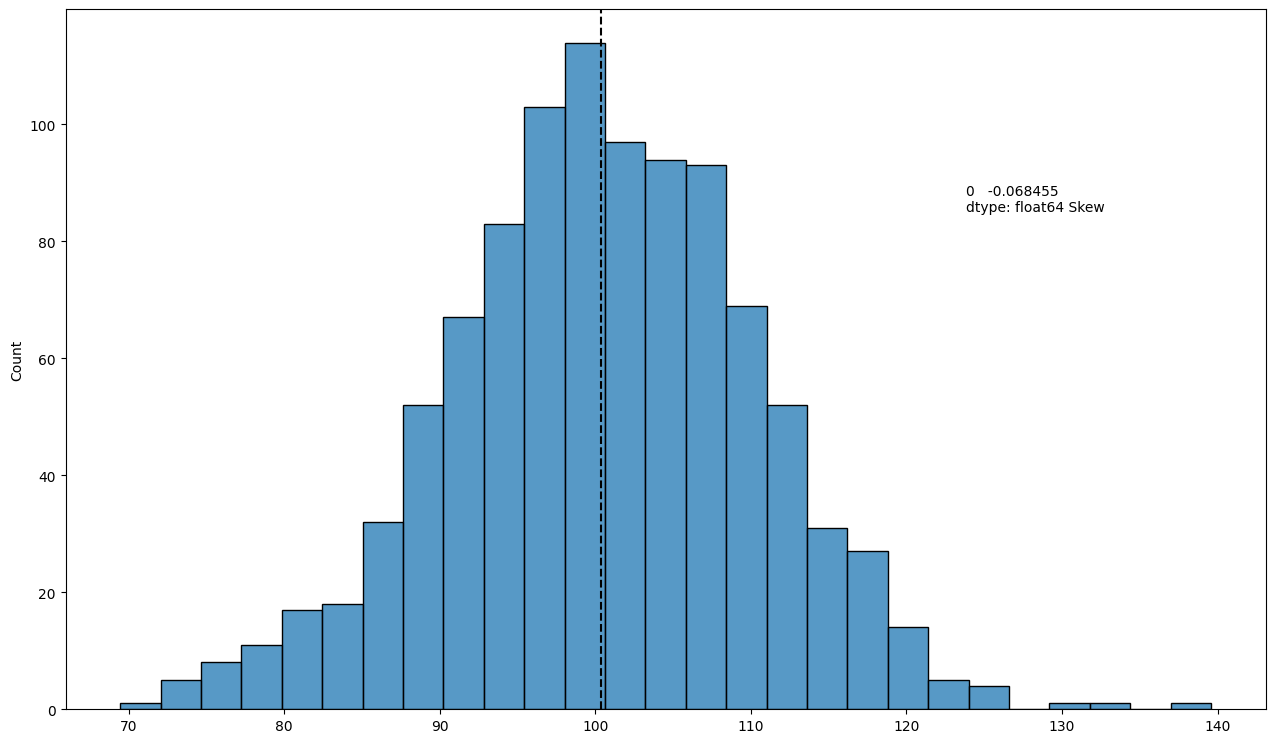

In [78]:
import matplotlib.patches as patches

# build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

fig , ax = plt.subplots(1,2,figsize=(12,7))
ax = fig.add_axes([0, 0, 1, 1])

# plt.subplots(1,2,figsize=(12,7))
# plt.subplot(1,2,1)
sns.histplot(data)
plt.axvline(data.mean(),color='k',linestyle='dashed')
# plt.subplot(1,2,2)
# sns.histplot(log_d)
# plt.axvline(log_d.mean(),color='k',linestyle='dashed',linewidth=3)

p = patches.Rectangle(
    (left, bottom), width, height,
    fill=False, transform=ax.transAxes, clip_on=False
    )
ax.text(right, top, f"{ff()} Skew",
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes)

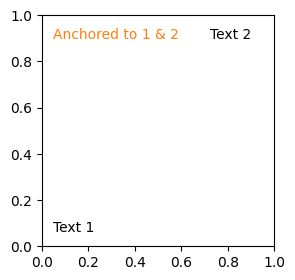

In [33]:
fig, ax = plt.subplots(figsize=(3, 3))

t1 = ax.text(0.05, .05, "Text 1", va='bottom', ha='left')
t2 = ax.text(0.90, .90, "Text 2", ha='right')
t3 = ax.annotate("Anchored to 1 & 2", xy=(0, 0), xycoords=(t1, t2),
                 va='bottom', color='tab:orange',)

In [ ]:
# right and top ? 
left1 , width1 = 0.25 , 0.5 
bottom1 , height1 = 0.25 , 0.5 
right1 = left1 + width1 
top1 = bottom1 + height1 





Text(0.85, 0.92, '0   -0.068455\ndtype: float64')

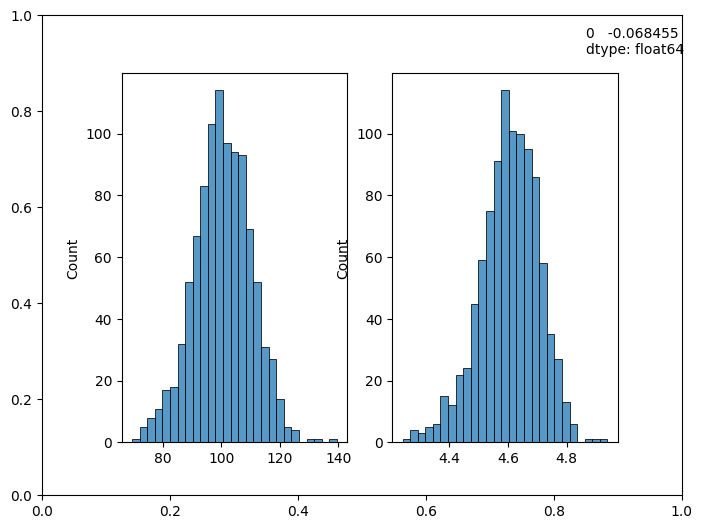

In [197]:
fig, ax = plt.subplots()

ax = fig.add_axes([0,0,1,1])

plt.subplot(1,2,1)
sns.histplot(data)

plt.subplot(1,2,2)
sns.histplot(log_d)

l,w = 0.25 , 0.6
b,h = 0.25 , 0.67
r = l+w 
t = b + h 

ax.text(r,t,ff())

Text(0.75, 0.92, '0   -0.068455\ndtype: float64')

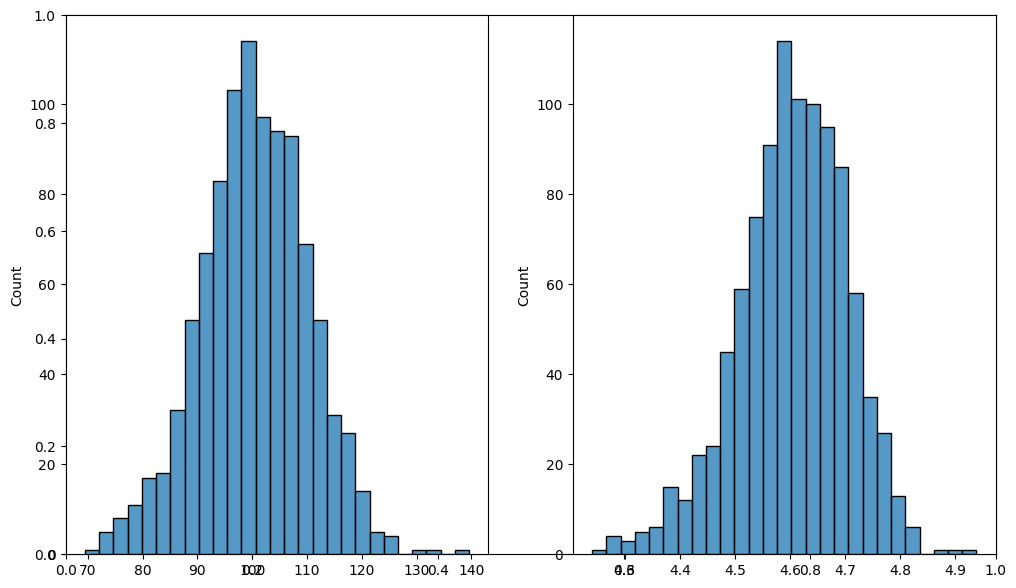

In [195]:
l,w = 0.25 , 0.5
b,h = 0.25 , 0.67
r = l+w 
t = b + h 
plt.subplots(figsize=(12,7)) # fig , ax is not used 
ax = fig.add_axes([0,0,1,1])

plt.subplot(1,2,1)
sns.histplot(data)
plt.subplot(1,2,2)
sns.histplot(log_d)

ax.text(r,t,ff())


Text(0.35, 130, '0   -0.068455\ndtype: float64')

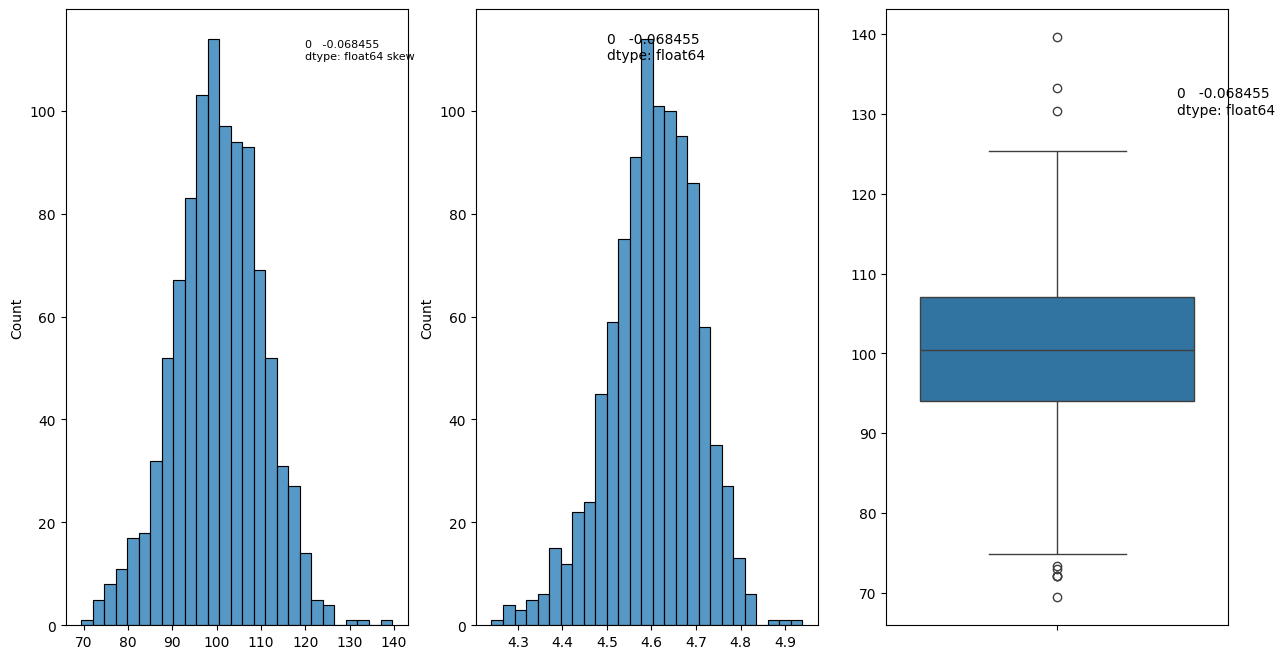

In [319]:
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
sns.histplot(data)
plt.text(120,110,f"{ff()} skew",fontsize=8)
plt.subplot(1,3,2)
sns.histplot(log_d)
plt.text(4.5,110,ff())
plt.subplot(1,3,3)
sns.boxplot(data)
plt.text(0.35,130,ff())

In [2]:
az = np.random.randint(1,10,(5,5))
az

array([[7, 8, 8, 4, 5],
       [4, 4, 9, 7, 6],
       [7, 9, 4, 2, 2],
       [4, 5, 4, 8, 2],
       [3, 4, 9, 9, 5]])

In [4]:
az[:,:-1]

array([[7, 8, 8, 4],
       [4, 4, 9, 7],
       [7, 9, 4, 2],
       [4, 5, 4, 8],
       [3, 4, 9, 9]])

In [8]:
az[:,-1]

array([5, 6, 2, 2, 5])

In [23]:
d = {
    "a" : 1,
    "b" : 6,
    "c" : 3
}

In [25]:
for key in d:
    if d[key] == max(d.values()):
        print(key)

b


In [24]:
max(list(d.values()))

6

In [11]:
for i in range(len(list(d.keys()))):
    model = list(d.values())[i]
    print(model)

1
2
3


In [16]:
dd = {}
for i in range(len(list(d.keys()))):
    dd3 = {}
    dd3[list(d.keys())[i]] = list(d.values())[i]
    dd[list(d.keys())[i]] = dd3
dd

{'a': {'a': 1}, 'b': {'b': 2}, 'c': {'c': 3}}

In [71]:
d4 = {
    "de" : {"asd" : [123,111], "dfgh" : 120000},
    "we" : {"qwe" : 4456},
    "ze" : {"zxc" : 7789}
}

In [72]:
inner_d = d4.values()
inner_d


dict_values([{'asd': [123, 111], 'dfgh': 120000}, {'qwe': 4456}, {'zxc': 7789}])

In [73]:
inner_dict_copy = list(inner_d)[0]
inner_dict_copy

{'asd': [123, 111], 'dfgh': 120000}

In [75]:
di = {"innnn" : {"dsfdsf" : 546871321654}}

dd4 = {}
for i in range(len(list(d4.keys()))):
    dd5 = {}
    inner_dict = list(d4.values())[i]
    for j in range(len(list(inner_dict.keys()))):
        
        dd5[list(inner_dict.keys())[j]] = list(inner_dict.values())[j]

        dd4[list(d4.keys())[i]] = dd5

dd4


{'de': {'asd': [123, 111], 'dfgh': 120000},
 'we': {'qwe': 4456},
 'ze': {'zxc': 7789}}

In [ ]:
aqz = {"sss" : {}}

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
data = pd.read_csv('../dataset/final_doordash.csv')
data


,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time,non_null_primary_category,time
0,1.0,1845,1.0,4,3441,4,33.0,14.0,21.0,446,861.0,3779.0,american,22
1,2.0,5477,2.0,1,1900,1,1.0,2.0,2.0,446,690.0,4024.0,indian,21
2,2.0,5477,3.0,4,4771,3,8.0,6.0,18.0,446,289.0,1586.0,indian,0
3,1.0,2841,1.0,1,1525,1,5.0,6.0,8.0,446,795.0,2273.0,italian,3
4,1.0,2841,1.0,2,3620,2,5.0,5.0,7.0,446,205.0,2988.0,italian,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172891,1.0,2956,4.0,3,1389,3,17.0,17.0,23.0,251,331.0,3907.0,fast,0
172892,1.0,2956,4.0,6,3010,4,12.0,11.0,14.0,251,915.0,3383.0,fast,0
172893,1.0,2956,4.0,5,1836,3,39.0,41.0,40.0,251,795.0,3008.0,fast,4
172894,1.0,3630,1.0,1,1175,1,7.0,7.0,12.0,446,384.0,3907.0,sandwich,18


In [3]:
data.columns

Index(['market_id', 'store_id', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'delivery_time',
       'non_null_primary_category', 'time'],
      dtype='object')

In [4]:
X = data.drop("delivery_time",axis=1)
y = data["delivery_time"]

In [7]:
for i in X.columns:
    print(f"{i},")

market_id,
store_id,
order_protocol,
total_items,
subtotal,
num_distinct_items,
total_onshift_dashers,
total_busy_dashers,
total_outstanding_orders,
estimated_order_place_duration,
estimated_store_to_consumer_driving_duration,
non_null_primary_category,
time,


In [5]:
for i in X.columns:
    print(f"self.{i} = {i}")

self.market_id = market_id
self.store_id = store_id
self.order_protocol = order_protocol
self.total_items = total_items
self.subtotal = subtotal
self.num_distinct_items = num_distinct_items
self.total_onshift_dashers = total_onshift_dashers
self.total_busy_dashers = total_busy_dashers
self.total_outstanding_orders = total_outstanding_orders
self.estimated_order_place_duration = estimated_order_place_duration
self.estimated_store_to_consumer_driving_duration = estimated_store_to_consumer_driving_duration
self.non_null_primary_category = non_null_primary_category
self.time = time


In [11]:
for i in X.columns:
    print(f"'{i}' : [self.{i}],")

'market_id' : [self.market_id],
'store_id' : [self.store_id],
'order_protocol' : [self.order_protocol],
'total_items' : [self.total_items],
'subtotal' : [self.subtotal],
'num_distinct_items' : [self.num_distinct_items],
'total_onshift_dashers' : [self.total_onshift_dashers],
'total_busy_dashers' : [self.total_busy_dashers],
'total_outstanding_orders' : [self.total_outstanding_orders],
'estimated_order_place_duration' : [self.estimated_order_place_duration],
'estimated_store_to_consumer_driving_duration' : [self.estimated_store_to_consumer_driving_duration],
'non_null_primary_category' : [self.non_null_primary_category],
'time' : [self.time],


In [15]:
class GG:
    def __init__(self,n,l):
        self.n = n 
        self.l = l 
        print(self.n , self.l)

obj = GG("faisal", "shaikh")
# print(obj)

faisal shaikh


In [18]:
l = [1,23,4,5,6]
print(f"{l}\nIt")

[1, 23, 4, 5, 6]
It
